# BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

## 기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [1]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""

In [3]:
from bs4 import BeautifulSoup

soup=BeautifulSoup(html_doc,'html.parser') # html언어로 파싱 첫번째 방법
soup=BeautifulSoup(html_doc,'lxml')    #html언어로 파싱 두번째 방법

print(soup)               
print(soup.prettify())    # 탭이 적용되어 이쁘게 출력


<html lang="en">
<head><title>crawl</title></head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div><img height="200" src="/source" width="300"/></div>
</body>
</html>

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [4]:
#태그 안의 텍스트 추출하기
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

In [5]:
soup=BeautifulSoup(html, 'html.parser')  #html데이터로 파싱
print(soup.prettify())

<html>
 <body>
  <h1>
   스크레이핑이란?
  </h1>
  <p>
   웹 페이지를 분석하는 것
  </p>
  <p>
   원하는 부분을 추출하는 것
  </p>
 </body>
</html>



In [9]:
#방법1: .string()
soup.string

In [6]:
#방법2: .text()
soup.text

'\n\n스크레이핑이란?\n웹 페이지를 분석하는 것\n원하는 부분을 추출하는 것\n\n'

In [7]:
#방법3: .get_text()
soup.get_text()

'\n\n스크레이핑이란?\n웹 페이지를 분석하는 것\n원하는 부분을 추출하는 것\n\n'

In [13]:
# p 태그를 이용해서 문자 추출하기

print(soup.p.string)
print(soup.p.text)
print(soup.p.get_text())

웹 페이지를 분석하는 것
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [19]:
# 첫번째 p태그의 다음 요소 내 문자 추출하기: next_sibling.next_sibling
### next_sibling을 두 번 사용하는 이유는 중간에 \n이 껴있기 때문임!

print(soup.p.next_sibling.next_sibling.string)
print(soup.p.next_sibling.next_sibling.text)
print(soup.p.next_sibling.next_sibling.get_text())

원하는 부분을 추출하는 것
원하는 부분을 추출하는 것
원하는 부분을 추출하는 것


---

## find() 
- HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴

In [20]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

In [22]:
soup=BeautifulSoup(html,'html.parser')

# 태그 요소를 사용해서 찾기

h1=soup.find('h1')
p=soup.find('p')

print(h1.text, h1.string, h1.get_text())
print(p.text, p.string, p.get_text())

스크레이핑이란? 스크레이핑이란? 스크레이핑이란?
웹 페이지를 분석하는 것 웹 페이지를 분석하는 것 웹 페이지를 분석하는 것


In [23]:
# id를 사용해서 찾기

titleid=soup.find(id='title')
bodyid=soup.find(id='body')

print(titleid.text)
print(bodyid.text)

스크레이핑이란?
웹 페이지를 분석하는 것


## find_all(), findAll() 
- HTML의 해당 태그에 대한 첫 번째 정보들을 가져옴

In [24]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

In [27]:
soup=BeautifulSoup(html, 'html.parser')

#방법1
ps=soup.find_all('p')
for p in ps:
    print(p.text)

#방법2
ps2=soup.findAll('p')
for p in ps2:
    print(p.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [28]:
#urlopen()과 BeautifulSoup의 조합

In [33]:
from bs4 import BeautifulSoup
import urllib.request as rq


url="http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"  #xml데이터
response=rq.urlopen(url)

soup=BeautifulSoup(response,'html.parser')  #urlopen으로 가져온 response를 바로 입력
soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2022년 07월 25일 (월)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2022년 07월 25일 (월)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202207250600</tm>
<wf><![CDATA[○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유

In [34]:
#타이틀 추출

title=soup.find('title').string
title

'기상청 육상 중기예보'

In [52]:
#기상예보 전체 추출

wfs=soup.find_all('wf')    # weather forecasting의 약자 ^^,,

for wf in wfs:
    print(wf.text)

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
맑음
구름많음
구름많음
구름많음
맑음
맑음
맑음
맑음
흐림
흐림
흐림
맑음
맑음
구름많음
구름많음
구름많음
구름많음
맑음
맑음
구름많음
흐림
흐림
흐림
흐림
맑음
맑음
구름많음
구름많음
구름많음
구름많음
맑음
맑음
구름많음
흐림
흐림
흐림
흐림
구름많음
구름많음
구름많음
맑음
맑음
구름많음
맑음
맑음
흐림
흐림
흐림
흐림
흐림
맑음
구름많음
맑음
구름많음
맑음
구름많음
맑음
맑음
구름많음
흐림
흐림
흐림
흐림
맑음
구름많음
맑음
구름많음
맑음
구름많음
맑음
맑음
구름많음
흐림
흐림
흐림
흐림
맑음
구름많음
맑음
구름많음
맑음
구름많음
맑음
맑음
구름많음
흐림
흐림
흐림
흐림
맑음
구름많음
맑음
구름많음
맑음
구름많음
맑음

In [50]:
#기상예보 요약줄 추출

wf=soup.find('wf').string
wf

'○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

In [51]:
#불필요한 기호 삭제

import re

re.sub('[^가-힣0-9()~. ]','',wf)

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다.   (기온) 이번 예보기간 아침 기온은 22~26도 낮 기온은 29~34도로 어제(24일 아침최저기온 22~24도 낮최고기온 25~32도)보다 높겠습니다.  (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다.                아침 기온은 23~25도 낮 기온은 31~34도가 되겠습니다.   이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

#### 과제 07/22_2
##### 다음과 같이 나타나도록 하시오
 ```
'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.
```

In [45]:
import requests
import re
from bs4 import BeautifulSoup

url="http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp" 
data=requests.get(url).text
soup=BeautifulSoup(data,'html.parser')
wf=soup.find('wf').string
wf

C:\Users\admin\anaconda3\envs\cakd7\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


'○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

In [46]:
#
wf_sub=re.sub('[^가-힣0-9(),~. ]','',wf)
re.sub('  ','',wf_sub)

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.(주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다.아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

In [47]:
#
wf_sub=re.sub(r'[*<>br○/]','',wf)
re.sub('  ','',wf_sub)

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.(주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다.아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

---

In [66]:
# find_all로 요소에 대해 class를 활용해서 정보 추출

import requests

req=requests.get('http://naver.com')

html=req.text    

soup=BeautifulSoup(html)     
            # requests로 불러온 url데이터는 .text로 변환해서 soup에 적용

In [68]:
# 한 개의 클래스로 추출

In [69]:
#방법1: class_속성

result=soup.find_all('span',class_='blind')
result

[<span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="blind">쇼핑</span>,
 <span class="blind">쇼핑LIVE</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="bl

In [70]:
result2=soup.find_all('span',class_='fix')
result2

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [72]:
#방법2: attrs 속성 활용

result2=soup.find_all('span', attrs={'class':'fix'})
result2

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [65]:
# 두 개 이상의 클래스를 가지고 추출

result3=soup.find_all('span',attrs={'class':['fix','blind']})
result3                      

[<span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>,
 <span class="blind">쇼핑</span>,
 <span class="blind">쇼핑LIVE</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span clas

## select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ".", id는 "#"로 표시

In [77]:
from bs4 import BeautifulSoup
from urllib import request

url= "https://finance.naver.com/marketindex/"

response=request.urlopen(url)
soup=BeautifulSoup(response,'html.parser')
price=soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value')
    #네이버 f12-> 커서로 추출하고자하는 부분을 누르고, 
    #마우스 오른쪽 클릭-> copy -> copy selector을 클릭하면 css 선택자가 복사됨
    
print('usd/krw= ',price.text)

usd/krw=  1,310.50


In [90]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [91]:
#html로 파싱 방법1: html.parser

bs=BeautifulSoup(html_doc,'html.parser')
bs

<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [92]:
#html로 파싱 방법2: lxml

bs=BeautifulSoup(html_doc,'lxml')
bs

<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [93]:
#타이틀 추출

bs.title

<title>The Dormouse's story</title>

In [94]:
#타이틀의 name 추출

bs.title.name

'title'

In [95]:
#타이틀의 부모요소 추출

bs.title.parent

<head><title>The Dormouse's story</title></head>

In [96]:
#타이틀의 부모요소 name 추출

bs.title.parent.name

'head'

In [97]:
#첫번째 p태그 추출

bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [103]:
#전체 p태그 추출

for p in bs.find_all('p'):
    print(p)

<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>


In [98]:
#전체 a태그 추출

for a in bs.find_all('a'):
    print(a)


<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


In [100]:
#a태그들 내 href 뽑아내기

for a in bs.find_all('a'):
    print(a.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [99]:
#id=link3인 a태그 추출

bs.find('a',id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

---

## string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [104]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [107]:
#get_text()

bs=BeautifulSoup(html_doc)
print(bs.get_text())     #따로 요소를 지정해주지않아도 전체 텍스트를 추출해냄, 요소 안에 텍스트가 없는 경우 공백으로 추출

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [117]:
for p in bs.find_all('p'):
    print(p.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [121]:
#text

print(bs.text)  #따로 요소를 지정해주지않아도 전체 텍스트를 추출해냄, 요소 안에 텍스트가 없는 경우 공백으로 추출

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [119]:
for p in bs.find_all('p'): 
    print(p.text)

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [116]:
#string

print(bs.string)        #요소 안에 '직접적'으로 텍스트가 들어있어야 텍스트값이 반환됨
print(bs.body.string)
print(bs.p.string)

None
None
The Dormouse's story


In [114]:
for p in bs.find_all('p'):   #요소 안에 '직접적'으로 텍스트가 들어있어야 텍스트값이 반환됨
    print(p.string)

The Dormouse's story
None
...


In [ ]:
#네이버 정치뉴스 크롤링을 lxml 파싱으로 해보기

In [126]:
import urllib.request as rq

url='https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

html=rq.urlopen(url)
bs=BeautifulSoup(html,'lxml')
print(bs)


<!DOCTYPE HTML>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh"/>
<meta content="width=1106" name="viewport"/>
<meta content="정치 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image"/>
<meta content="국회, 행정, 국방, 외교 등 정치 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="정치 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitt

In [127]:
text=bs.p.get_text()
print(text)

AiRS추천으로 구성된 뉴스를 제공합니다.


In [125]:
#전체 a태그 찾아서 텍스트 추출

text2=bs.find_all('a')

for t in text2:
    print(t.get_text(),end='')

메인 메뉴로 바로가기본문으로 바로가기검색NAVER뉴스TV연예스포츠날씨프리미엄언론사별 정치 선택됨경제 사회 생활/문화 IT/과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사뉴스스탠드라이브러리전체 언론사뉴스스탠드라이브러리정치대통령실 국회/정당 북한 행정 국방/외교 정치일반 안내헤드라인 뉴스

안보실 "북송 자료 놀랄 정도로 없었다"…文정부 폐기의혹 언급[속보]안보실 "북송 인수인계 없었다…놀라울만큼 자료 없어"대통령실 “탈북어민 북송사건 인수인계 받은 내용 놀라울 정도로 없어”국가안보실, ‘탈북어민 강제북송’ “놀라울 정도로 자료가 없다”25개의 관련뉴스 더보기

민주, 이상민 ‘쿠데타’ 비유에 맹공…“언어도단에 적반하장”우상호, 이상민 '쿠데타' 언급에 "언어도단에 적반하장"우상호 "경찰 장악에 비서실장 등판...尹 지시로 해석"우상호 “김대기는 경찰 장악, 이상민은 쿠데타 발언···적반하장·어이없어”14개의 관련뉴스 더보기

윤 대통령, 다음 주 여름휴가…"8월 중 국회의장단 회동"尹대통령, 8월 중 국회의장단 만찬 회동 추진[속보] 尹 대통령, 국회의장단과 8월 중 회동 추진대통령실 "8월 중 尹-국회 의장단 만찬 추진"22개의 관련뉴스 더보기

동영상기사
野 "주가조작 회장 아들 尹 취임식 참석...이유 밝혀야"민주 “권오수 아들 왜 취임식왔나”…대통령실 “확인 어려워”野 "도이치모터스 회장아들, 尹 취임식 참석…이유 밝혀야"민주 "도이치 권오수 아들, 尹 취임식 참석..초청자 밝혀야"18개의 관련뉴스 더보기

동영상기사
용산 대통령실에 발달장애 예술가 작품 전시

尹 사로 잡은 발달장애 예술가 작품 15점…"대검 것과 비슷하지?"30개의 관련뉴스 더보기

박용진 "강병원·설훈·김민석, '선제적 단일화' 하자"…반이재명 전선구축

박용진 "혁신 단일화, 빠르게 가자"…'비명계' 선제적 단일화 촉구54개의 관련뉴스 더보기

감사원 1차장에 '태양광 비리 감사' 김경호‥2차장 현완교

감사원 1차장에 '태양광 비리 감사' 김경호…이례적 세평 공개도1

In [132]:
#첫번째 p태그 찾아서 텍스트 추출

item=bs.find('div').find('a')
item.text

'메인 메뉴로 바로가기'

In [133]:
#첫번째 div태그 내 a태그 찾아서 텍스트 추출

items=bs.find('div').find_all('a')

for item in items:
    print(item)

<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>
<a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>
<a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>
<a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>
<a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>
<a class="entertain nclicks(gnb.enter)" href="https://entertain.naver.com/home">TV연예</a>
<a class="sports nclicks(gnb.sports)" href="https://sports.news.naver.com">스포츠</a>
<a class="weather nclicks(gnb.weather)" href="https://weather.naver.com">날씨</a>
<a class="premium nclicks(gnb.premium)" href="https://contents.premium.naver.com">프리미엄</a>
<a class="nclicks(lnb.pcmedia)" href="/"><span class="tx">언론사별</span> </a>
<a class="nclicks(lnb.pol)" href="/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100"><span class="tx">정치</span> <span class="blind">선택됨</span></a>
<a 

In [134]:
#텍스트 추출

for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스


동영상기사

'경찰국 신설' 정치권도 논란...尹 정부 첫 대정부질문
여야, 대정부질문서 격돌…어민 북송·경찰국 쟁점
尹 정부 대정부질문 첫날...경찰국·사적채용 등 공방
‘경찰국·북송·사적 채용’ 격랑 휘말린 정국…민생은 또 뒷전
12개의 관련뉴스 더보기



민주 당권 주자 28일 ‘예비경선’…이재명 외 본선행 2명 ‘예측불허’
박용진 "예비경선 전 '혁신 단일화' 하자"...단일화 거듭 촉구
민주당 예비경선, 단일화 없이 치르나?...각자도생하는 당권 주자들
박용진 "예비경선 전 '혁신 단일화'"...강병원·설훈 "동참"
54개의 관련뉴스 더보기


동영상기사

 권영세 "북송 사건, 분명히 잘못된 조치라고 생각"[현장연결]
권영세 "통일부, 北어민 북송 뒤치다꺼리...의사결정 관여 못 해"
권영세 “탈북민 의사 반한 북송, 2019년 ‘어민북송’이 유일”
권영세, 탈북어민 북송결정 "통치행위라고 볼 수 없어"
24개의 관련뉴스 더보기



대통령실 “정부 인수인계 때, 탈북 어민 자료 놀라울 정도로 없었다”
안보실 "북송 관련 인수인계 없었다…놀라울 정도로 자료 없어"
대통령실 “강제북송, 인수인계 포함 안돼… 놀라울 정도로 자료 없었다”
대통령실 “탈북어민 북송사건 인수인계 받은 내용 놀라울 정도로 없어”
25개의 관련뉴스 더보기



용산 대통령실 1층 로비에 발달장애 예술가 작품 전시



“이 그림 사고 싶었는데”…尹, 발달장애 작가 작품 관람
30개의 관련뉴스 더보기



이재명 “한시적 공매도 금지해야. 尹 경제 정책은 빨간색 청개구리”



이재명 "尹정부 경제·민생대책 거꾸로…공

In [136]:
#id가 header인 첫번째 div태그 내 a태그 찾기

items=bs.find('div',id='header').find_all('a')
items

[<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>,
 <a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>,
 <a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>,
 <a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>,
 <a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>,
 <a class="entertain nclicks(gnb.enter)" href="https://entertain.naver.com/home">TV연예</a>,
 <a class="sports nclicks(gnb.sports)" href="https://sports.news.naver.com">스포츠</a>,
 <a class="weather nclicks(gnb.weather)" href="https://weather.naver.com">날씨</a>,
 <a class="premium nclicks(gnb.premium)" href="https://contents.premium.naver.com">프리미엄</a>,
 <a class="nclicks(lnb.pcmedia)" href="/"><span class="tx">언론사별</span> </a>,
 <a class="nclicks(lnb.pol)" href="/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100"><span class="tx">정치</span> <span class="blin

In [138]:
#텍스트 추출
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


---

#### 과제 07/25_1
##### Q. 상기 출력물을 불필요한 공백없이 정렬하여 출력하세요.(방법은 마음대로~)

In [87]:
import urllib
from bs4 import BeautifulSoup

url='https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'

In [88]:
response=urllib.request.urlopen(url)

soup=BeautifulSoup(response, 'html.parser')

soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="정치 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="국회, 행정, 국방, 외교 등 정치 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="정치 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter

In [91]:
#id가 header인 div태그 내 전체 a태그 찾기

a=soup.find('div').find_all('a')
a

[<a href="#lnb" tabindex="1"><span>메인 메뉴로 바로가기</span></a>,
 <a href="#main_content" tabindex="2"><span>본문으로 바로가기</span></a>,
 <a class="tool_button _search_content_toggle_btn nclicks(gnb.sch)" href="javascript:;"><span class="icon_search">검색</span></a>,
 <a class="h_logo nclicks(gnb.naver)" href="https://www.naver.com/"><span class="blind">NAVER</span></a>,
 <a class="h_news nclicks(gnb.news)" href="/"><span class="blind">뉴스</span></a>,
 <a class="entertain nclicks(gnb.enter)" href="https://entertain.naver.com/home">TV연예</a>,
 <a class="sports nclicks(gnb.sports)" href="https://sports.news.naver.com">스포츠</a>,
 <a class="weather nclicks(gnb.weather)" href="https://weather.naver.com">날씨</a>,
 <a class="premium nclicks(gnb.premium)" href="https://contents.premium.naver.com">프리미엄</a>,
 <a class="nclicks(lnb.pcmedia)" href="/"><span class="tx">언론사별</span> </a>,
 <a class="nclicks(lnb.pol)" href="/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=100"><span class="tx">정치</span> <span class="blin

In [92]:
#불필요한 공백없이 정렬

#방법1

a_text=''

for t in a:
    a_text+=t.text.strip()+' '
print(a_text)

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활/문화 IT/과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실 국회/정당 북한 행정 국방/외교 정치일반   안내헤드라인 뉴스 與, 文정부 어민북송 공격… 野, 인사·경찰 장악 질타 사적채용·경찰국 vs 어민 북송…공수 바뀐 여야 첫 대정부질문 與, '文외교안보' 정면비판…野 '尹인사·경찰국' 난타(종합) 여 "잘못된 강제 북송" vs 야 "간섭·통제 경찰국"…대정부질문 첫날 맞붙었다 23개의 관련뉴스 더보기  한 총리 "대통령 친인척 채용 불합리한 처우 안 돼…별정직 달라"(종합) 한총리, 대통령 친인척채용 논란에  "능력·경력 같이 봐야" 한총리, 尹대통령 친인척 채용 논란에 "경력 등 같이 검토해야" 고민정 "대통령 친인척 근무 적절한가"→한총리 "불합리한 처우 받아선 안돼" 6개의 관련뉴스 더보기  尹, 28일 조코위 인니 대통령과 정상회담 조코위 인니 대통령 27일 방한…"尹정부, 아세안 외교 본격 시작"(상보) 韓·印尼 정상회담… KF-21 분담금 논의 조코위 인니 대통령, 현대차연구소 28일 방문 35개의 관련뉴스 더보기  "유엔사가 북 어민 판문점 통과 승인"...'유엔사 거절' 주장 틀려 ‘文정부 어민 북송’ 따지던 與, ‘유엔사 승인’ 답변에 머쓱 與 탈북어민 북송 '유엔사 패싱'주장에 이종섭 "승인 하 판문점 통과" 국힘 “어민 북송, 유엔사 동의 없이 판문점 출입” 주장에…통일·국방장관 “승인 있었다” 21개의 관련뉴스 더보기 정부 “강제북송 법적 근거 없어” 野 “사적 채용 줄줄이 사탕”  공수 바뀐 여야…與 ‘강제 북송’ 규탄, 野 ‘사적 채용’ 정조준 5개의 관련뉴스 더보기  우원식 “모든 유공자법에 교육·취업 혜택… 민주유공자법만 뺄 순 없어”  세습 특혜? 열사들 대부분, 자녀도 없이 돌아가셨다 24개의 관련뉴스 더보기  대통령

In [105]:
#방법2

li=[]
for i in a:
    li.append(i.text)
    
a_text=' '.join(li)
a_text=re.sub('[^가-힣0-9 ]','',a_text)
a_text=re.sub('\s{1,}',' ',a_text)
a_text

'메인 메뉴로 바로가기 본문으로 바로가기 검색 뉴스 연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실 국회정당 북한 행정 국방외교 정치일반 안내헤드라인 뉴스 정부 어민북송 공격 인사경찰 장악 질타 사적채용경찰국 어민 북송공수 바뀐 여야 첫 대정부질문 외교안보 정면비판 인사경찰국 난타종합 여 잘못된 강제 북송 야 간섭통제 경찰국대정부질문 첫날 맞붙었다 23개의 관련뉴스 더보기 한 총리 대통령 친인척 채용 불합리한 처우 안 돼별정직 달라종합 한총리 대통령 친인척채용 논란에 능력경력 같이 봐야 한총리 대통령 친인척 채용 논란에 경력 등 같이 검토해야 고민정 대통령 친인척 근무 적절한가한총리 불합리한 처우 받아선 안돼 6개의 관련뉴스 더보기 28일 조코위 인니 대통령과 정상회담 조코위 인니 대통령 27일 방한정부 아세안 외교 본격 시작상보 정상회담 21 분담금 논의 조코위 인니 대통령 현대차연구소 28일 방문 35개의 관련뉴스 더보기 유엔사가 북 어민 판문점 통과 승인유엔사 거절 주장 틀려 정부 어민 북송 따지던 유엔사 승인 답변에 머쓱 탈북어민 북송 유엔사 패싱주장에 이종섭 승인 하 판문점 통과 국힘 어민 북송 유엔사 동의 없이 판문점 출입 주장에통일국방장관 승인 있었다 21개의 관련뉴스 더보기 정부 강제북송 법적 근거 없어 사적 채용 줄줄이 사탕 공수 바뀐 여야 강제 북송 규탄 사적 채용 정조준 5개의 관련뉴스 더보기 우원식 모든 유공자법에 교육취업 혜택 민주유공자법만 뺄 순 없어 세습 특혜 열사들 대부분 자녀도 없이 돌아가셨다 24개의 관련뉴스 더보기 대통령실 탈북어민 북송 자료 인수인계 과정에 없어놀라울 정도 윤건영 정부 북송 어민 관련 자료 있다면 그게 큰일 28개의 관련뉴스 더보기 동영상기사 박범계 인사 한동훈 다해한동훈 박장관 땐 윤총장 패싱 실세장관 2인 집중 타깃한 민주 엄호 대치전선종합 92개의 관련뉴스 더보

---

In [91]:
texts=bs.find_all('p')
texts

[<p class="airs_info_inner"><i class="airs_info_icon_airs">AiRS</i><span class="airs_info_text"><b>추천</b>으로 구성된 뉴스를 제공합니다.</span></p>,
 <p class="section_sub_txt">오전 11시~오후 12시까지 집계한 결과입니다.</p>,
 <p class="copyright">본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.</p>]

In [94]:
for t in texts:
    print(t.string)

None
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [95]:
for t in texts:
    print(t.get_text())

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [122]:
import urllib.request as rq
import re

url='http://news.naver.com'
html=rq.urlopen(url)
bs=BeautifulSoup(html)

#한글만 뽑아내기

#방법1
text=bs.get_text()
p=re.findall('[가-힣 ]+',text)

hangeul=''
for i in p:
    hangeul+=i+' '
    hangeul=re.sub('[\s]{2,}','',hangeul)
print(hangeul)

네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자연재구독설정시사저널 월일구독 오르는 금리떨어지는 집값영끌족 상환 부담에비상 영끌족대출금리월부터 원리금만원 부담전체 가계대출 중세대 비중대보다 높아대출금리가포인트나 올랐습니다대 남성씨는년 경기 서울경제 월일구독 피겨여왕김연아월 결혼 세 연하 예비신랑 누구 피겨 여왕김연아 가 그룹 포레스텔라 멤버 팝페라 가수 고우림 과 결혼한다일 김연아의 매니지먼트사 올댓스포츠는김연아가 오는월 하순 서울 모처에서 성악가 고우림과 화촉을 밝힌다 고 밝혔다 광주방송 월일구독지지율주째대 긍정부정윤석열 대통령의 국정수행 지지율이 또 소폭 하락했다는 여론조사 결과가 나왔습니다리얼미터가 지난일 닷새 동안 전국세 이상 유권자명을 대상으로 윤 대통령의 국정 수행에 대한 평가를 조사한여성신문 월일구독 돌아온 대작햄릿 배우들 열연에 감탄여혐 서사는 아쉽 년 전 전석 매진작 배우 제작진 귀환 전무송 박정자 손숙 등 대배우들 조연 젊은 배우들이 주연 맡아 현대적 외피 두른 정통극 배우들 열연 빛나여성혐오지적 받는 원작 속 가부장 사회 수동적인 여성 비즈니스워치 월일구독 말라가는 동학개미 실탄 주가 전망에 쏠린눈 지난해 코로나 로 인한 급락장 이후 대세 상승장의 기류에 올라탄 동학개미들의 활동력이 현저하게 떨어졌다잠재적 투자 자금인 예탁금은 올해 들어 부쩍 감소하고 있고 거래대금도 예년 수준에 미치지 못하는 상황에 마주 새로보기 한겨레 월일구독 누가의 버터비치를 녹이나 에너지 문제는 복잡하지만 더 지속 가능한 길이 있을 겁니다단기적으론 석탄이 경제적이어도 장기적으로 사회가 감당 가능하고 적절한 에너지 생산 방법이 있습니다사회에 더 이익이 가는 방향으로 가야 합니다미디어오늘 월일구독 국민의힘 수신료 폐지주장에비전문가적 주장비판한노조 프랑스가수신료 폐지를 결정하면서 국민의힘

In [123]:
#방법2
text=str(bs)
p=re.findall('[가-힣 ]+',text)
re.sub('\s{1,}',' ',' '.join(p))

' 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 시사저널 월 일 시사저널 구독 오르는 금리 떨어지는 집값 영끌족 상환 부담에 비상 영끌족 대출금리 월부터 원리금 만원 부담 전체 가계대출 중 세대 비중 대보다 높아 대출금리가 포인트나 올랐습니다 대 남성 씨는 년 경기 서울경제 월 일 서울경제 구독 피겨여왕 김연아 월 결혼 세 연하 예비신랑 누구 피겨 여왕 김연아 가 그룹 포레스텔라 멤버 팝페라 가수 고우림 과 결혼한다 일 김연아의 매니지먼트사 올댓스포츠는 김연아가 오는 월 하순 서울 모처에서 성악가 고우림과 화촉을 밝힌다 고 밝혔다 광주방송 월 일 광주방송 구독 지지율 주째 대 긍정 부정 윤석열 대통령의 국정수행 지지율이 또 소폭 하락했다는 여론조사 결과가 나왔습니다 리얼미터가 지난 일 닷새 동안 전국 세 이상 유권자 명을 대상으로 윤 대통령의 국정 수행에 대한 평가를 조사한 여성신문 월 일 여성신문 구독 돌아온 대작 햄릿 배우들 열연에 감탄 여혐 서사는 아쉽 년 전 전석 매진작 배우 제작진 귀환 전무송 박정자 손숙 등 대배우들 조연 젊은 배우들이 주연 맡아 현대적 외피 두른 정통극 배우들 열연 빛나 여성혐오 지적 받는 원작 속 가부장 사회 수동적인 여성 비즈니스워치 월 일 비즈니스워치 구독 말라가는 동학개미 실탄 주가 전망에 쏠린 눈 지난해 코로나 로 인한 급락장 이후 대세 상승장의 기류에 올라탄 동학개미들의 활동력이 현저하게 떨어졌다 잠재적 투자 자금인 예탁금은 올해 들어 부쩍 감소하고 있고 거래대금도 예년 수준에 미치지 못하는 상황에 마주 새로보기

In [131]:
url='http://news.naver.com'
html=rq.urlopen(url)
bs=BeautifulSoup(html)
texts= bs.find_all('p')

for t in texts:
    print(t.get_text())

한국 스포츠계의 '슈퍼스타' 김연아가 오는 10월 5살 연하 성악가와 결혼한다. 김연아의 매니지먼트사인 올댓스포츠는 25일 보도자료를 통해 "김연아가 10월 하순 서울 모처에서 성악가 고우림(27)과 화촉을 밝힌다"
전국 경찰서장 회의에 참석했다가 대기발령 조치를 당한 울산중부경찰서장 류삼영 총경이 "휴일에 정당한 절차를 거쳐 세미나 형식을 회의를 한 것에 대한 징계는 부당하고 해당 모임에 대해 강제해산 명령은 오히려 직권 남용
'피겨퀸' 김연아가 오는 10월 결혼합니다. 김연아의 매니지먼트사 올댓스포츠는 오늘(25일) "김연아가 오는 10월 하순 서울 모처에서 성악가 고우림과 화촉을 밝힌다"라고 전했습니다. 고우림은 서울대 성악과를 졸업한
[분화 경계 수준 레벨5 '피난' 격상, 주민 33세대 51명 전원 대피 완료… "대규모 분화 임박한 상황은 아니다"] 일본 규슈 남쪽 가고시마현에 있는 활화섬 사쿠라지마가 25일 이틀 연속 강하게 분화했다. 현지 
'영끌족', 대출금리 2.2%→5% "8월부터 원리금 150만원 부담" 전체 가계대출 중 2030세대 비중 27.5%…"50대보다 높아" "대출금리가 2.8%포인트나 올랐습니다." 30대 남성 A씨는 2020년 경기
‘피겨퀸’ 김연아(32)가 오는 10월 결혼한다. 김연아의 매니지먼트사인 올댓스포츠는 25일 “김연아가 10월 하순 서울 모처에서 성악가 고우림(27)과 화촉을 밝힌다”고 밝혔다. 고우림의 소속사도“김연아와 3년 열
행정안전부 경찰국 신설에 반대해 전국 경찰서장 회의를 주도한 류삼영 총경이 대기발령 조치를 받자 일선 경찰들이 "나도 징계하라"며 크게 반발하고 있습니다. 유근창 경남 마산동부경찰서 양덕지구대장은 오늘 오전 경찰 내
한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 2세대가 있다. 본인 또는 부모가 외국으로부터 이주한 경험이 있는 ‘이주배경 청년’이다. 여기서 ‘이주’란 중국, 베트남, 몽골, 러시아 등 외
‘피겨여왕’ 김연아가 성악가이자 그룹 포레스텔라 멤버 고우

In [142]:
import requests
from bs4 import BeautifulSoup

url='https://news.naver.com'

response=requests.get(url)
html=response.text
bs=BeautifulSoup(html,'html.parser')


ps=bs.find_all('p')

for p in ps:
    print(p.get_text())

1000원 미만 초저가 마트 즉석밥도 인기 퇴근하고 집에 와서 배가 고픈데 밥솥에 밥이 똑 떨어졌을 때 부엌 ‘상비군’ 즉석밥을 찾는 사람이 적잖을 것이다. 코로나19에 감염돼 집에서 자가격리를 해야 했을 때도 즉석
“에너지 문제는 복잡하지만 더 지속 가능한 길이 있을 겁니다. 단기적으론 석탄이 경제적이어도 장기적으로 사회가 감당 가능하고 적절한 에너지 생산 방법이 있습니다. 사회에 더 이익이 가는 방향으로 가야 합니다.” 20
전라북도교육청이 지방공무원 필기시험 합격자를 발표했습니다. 전북교육청은 교육행정 직군에서 245명, 전산과 사서, 공업 등 나머지 10개 분야에서 67명 등 총 312명의 필기시험 합격자를 결정했으며, 이들을 대상으
일본 출입국관리소에 수용된 외국인 여성들을 만나온 오다 아사히(織田朝日) 씨는 출입국관리 체계와 수용시설의 문제점을 지적하는 활동을 하고 있다. 출입국관리 시스템에 의해 수용된 여성들의 실태를 오다 씨가 직접 전한다
2018년 아이스쇼에서 첫 만남…비공개 결혼식 '피겨퀸' 김연아(32)가 오는 10월 결혼한다. 김연아의 매니지먼트사인 올댓스포츠는 25일 "김연아가 10월 하순 서울 모처에서 성악가 고우림(27)과 화촉을 밝힌다"
#. 지난 4월 철거공사를 끝낸 서울 용산의 한 다세대주택(빌라). 건물 4개를 허문 자리에 각종 폐기물이 방치된 채로 공사장 인부들은 물론 포클레인 등 공사 장비가 3개월째 자취를 감춰버렸다. 건축비 상승으로 공사
문화재청은 인기리에 방송 중인 '이상한 변호사 우영우'에 등장한 팽나무의 문화재적 가치를 판단하기 위해 천연기념물 지정 조사를 하기로 했습니다. 이 드라마 8회에 나온 팽나무는 경남 창원시 북부리 마을 산정에 우뚝 
올 초 전 국민을 충격에 빠뜨렸던 '계곡 살인 사건'이 일어난 경기도 가평 용소계곡에 관광객들의 발길이 북새통을 이루고 있다. 이곳에서는 지난해 7월에도 30대 남성이 숨지는 등 매년 익사 사고가 발생하고 있으나 이
정부, 9600여t 공급 발표 농가·중도매인·농협 곤혹 창

#### 과제 07/25_2
##### 기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨 예보를 불필요한 공백을 제거한 후 출력하세요. 

In [8]:
url='https://www.weather.go.kr/plus/land/forecast/summary.jsp'


#https://www.weather.go.kr/plus/land/forecast/summary.jsp?stnId=105&x=35&y=8

In [9]:
import requests

params={'stnId': 105}   #기상청 날씨예보를 강원도로 검색

response=requests.get(url,params=params)   #강원도 예보 불러오기

html_data=response.text
bs=BeautifulSoup(html_data)
bs

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<title>예보요약 &gt; 동네예보 &gt; 단기예보 &gt; 육상날씨 &gt; 기상플러스 </title>
<meta charset="utf-8"/>
<meta content="육상날씨 - 기상청 기상 플러스" name="title"/>
<meta content="기상청" name="author"/>
<meta content="육상날씨,날씨,기상청,기상 플러스" name="keywords"/>
<meta content="기상청 날씨누리 기상플러스 육상날씨입니다." name="description"/>
<link href="/plus/resources/css/slick.css?ver=2020092501" rel="stylesheet" type="text/css"/>
<link href="/plus/resources/css/basic.css?ver=2020092501" rel="stylesheet" type="text/css"/>
<link href="/plus/resources/css/common-layout.css?ver=2020092501" rel="stylesheet" type="text/css"/>
<link href="/plus/resources/css/plus.css?ver=2020092501" rel="stylesheet" type="text/css"/>
<link href="/plus/resources/css/custom.css?ver=2020092501" rel="stylesheet" type="text/css"/>
<script src="/plus/resources/js/moment-with-locales.js"></script>
<script src="/plus/resources/js/jquery-1.7.2.min.js"></script>
<script src="/plus

In [12]:
#예보 테이블 내 텍스트 추출하기

wf=bs.find('table',class_='table_announcementtime').text
wf

'\n오늘 ~ 모레 날씨 요약\n\n\n\n\n\n오늘( 07월 26일) ~ 모레( 07월 28일)\n\n\n\n\n\n□  (종합) 무더위 유의, 오늘과 내일 강원영서 중심 소나기 곳, 돌풍과 천둥.번개 유의\n○  (오늘) 강원내륙과 산지 가끔 구름많음, 강원동해안 대체로 맑음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳\n○  (내일) 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳\n○  (모레) 강원영서 구름많음, 강원영동 대체로 흐림\n\n□  소나기에 의한 예상 강수량\n○  (26일)강원영서: 5~40mm\n○  (27일)강원영서: 5~20mm\n\n\n\n\n평년, 어제, 오늘, 내일, 모레 기온 최저/최고, 파고 정보\n\n\n\n\n\n\n\n\n\n\n\n예보요소\n평년(오늘)\n어제(25일)\n오늘(26일)\n내일(27일)\n모레(28일)\n\n\n\n\n기온(℃)\n최저\n\n17.9 ~ 22.9\n\n\n18.1 ~ 23.2\n\n\n-\n\n\n17 ~ 24\n\n\n16 ~ 23\n\n\n\n최고\n\n24.0 ~ 30.6\n\n\n25.2 ~ 33.7\n\n\n27 ~ 34\n\n\n26 ~ 33\n\n\n25 ~ 32\n\n\n\n\r\n\t\t\t\t\t\t\t\t파고(m)\r\n\t\t\t\t\t\t\t\t\n강원북부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n\n강원중부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n\n강원남부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n\n\n\n\n\n'

In [13]:
#불필요한 공백 제거

import re
wf=re.sub('[○□]*','',wf)
wf=re.sub('\s{1,}',' ',wf).strip()
wf

'오늘 ~ 모레 날씨 요약 오늘( 07월 26일) ~ 모레( 07월 28일) (종합) 무더위 유의, 오늘과 내일 강원영서 중심 소나기 곳, 돌풍과 천둥.번개 유의 (오늘) 강원내륙과 산지 가끔 구름많음, 강원동해안 대체로 맑음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳 (내일) 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳 (모레) 강원영서 구름많음, 강원영동 대체로 흐림 소나기에 의한 예상 강수량 (26일)강원영서: 5~40mm (27일)강원영서: 5~20mm 평년, 어제, 오늘, 내일, 모레 기온 최저/최고, 파고 정보 예보요소 평년(오늘) 어제(25일) 오늘(26일) 내일(27일) 모레(28일) 기온(℃) 최저 17.9 ~ 22.9 18.1 ~ 23.2 - 17 ~ 24 16 ~ 23 최고 24.0 ~ 30.6 25.2 ~ 33.7 27 ~ 34 26 ~ 33 25 ~ 32 파고(m) 강원북부앞바다 0.5~1.0 0.5~1.0 0.5~1.0 강원중부앞바다 0.5~1.0 0.5~1.0 0.5~1.0 강원남부앞바다 0.5~1.0 0.5~1.0 0.5~1.0'

- 다른방법으로 

In [15]:
#1. 발표시각 추출

time=bs.find('i',class_='ann').next_sibling.next_sibling
time_text=time.text
time_text

'2022년 07월 26일 (화)요일 05:00 발표'

In [16]:
#2. 기상예보 테이블 추출 

table=bs.find('table',class_='table_announcementtime').find_all('tr')
table

[<tr>
 <th class="top_line" scope="col">오늘( 07월 26일) ~ 모레( 07월 28일)</th>
 </tr>,
 <tr>
 <td style="vertical-align:top">
 <p><span class="depth_1">□  (종합) 무더위 유의, 오늘과 내일 강원영서 중심 소나기 곳, 돌풍과 천둥.번개 유의</span><br/>
 <span class="depth_2">○  (오늘) 강원내륙과 산지 가끔 구름많음, 강원동해안 대체로 맑음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳</span><br/>
 <span class="depth_2">○  (내일) 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳</span><br/>
 <span class="depth_2">○  (모레) 강원영서 구름많음, 강원영동 대체로 흐림<br/>
 </span><br/>
 <span class="depth_1">□  소나기에 의한 예상 강수량</span><br/>
 <span class="depth_2">○  (26일)강원영서: 5~40mm</span><br/>
 <span class="depth_2">○  (27일)강원영서: 5~20mm<br/>
 <br/>
 </span><br/>
 </p>
 <table class="table_basic_2 MT10 MB10">
 <caption class="blind">평년, 어제, 오늘, 내일, 모레 기온 최저/최고, 파고 정보</caption>
 <colgroup>
 <col style="width:40px"/>
 <col/>
 <col/>
 <col/>
 <col/>
 <col/>
 <col/>
 </colgroup>
 <thead>
 <tr>
 <th class="border-top" colspan="2" scope="colgroup">예보요소</th>
 <th class="border-top" scope="col">평년(오늘)

In [17]:
#2_1.예보 기간 추출
import re

period=table[0].text
period=re.sub('\n','',period)
period

'오늘( 07월 26일) ~ 모레( 07월 28일)'

In [19]:
#2_2. 종합 예보내용 추출


overall=table[1].find('p')   #종합 예보 전체가 기술된 p태그 추출

overall_span=overall.find_all('span')   #p태그 내 span을 한줄씩 추출

overall=''
for span in overall_span:
    if span.text[0]=='○':
        overall+='  '+span.text.strip()+'\n'
    else:
        overall+=span.text+'\n'
print(overall)

□  (종합) 무더위 유의, 오늘과 내일 강원영서 중심 소나기 곳, 돌풍과 천둥.번개 유의
  ○  (오늘) 강원내륙과 산지 가끔 구름많음, 강원동해안 대체로 맑음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
  ○  (내일) 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
  ○  (모레) 강원영서 구름많음, 강원영동 대체로 흐림
□  소나기에 의한 예상 강수량
  ○  (26일)강원영서: 5~40mm
  ○  (27일)강원영서: 5~20mm



In [23]:
#2_3.표 안에 종합 예보내용 추출

rows=table[2:]

wf_text=''
for row in rows:
    wf_text+=row.text.strip()
wf_text

'예보요소\n평년(오늘)\n어제(25일)\n오늘(26일)\n내일(27일)\n모레(28일)기온(℃)\n최저\n\n17.9 ~ 22.9\n\n\n18.1 ~ 23.2\n\n\n-\n\n\n17 ~ 24\n\n\n16 ~ 23최고\n\n24.0 ~ 30.6\n\n\n25.2 ~ 33.7\n\n\n27 ~ 34\n\n\n26 ~ 33\n\n\n25 ~ 32파고(m)\r\n\t\t\t\t\t\t\t\t\n강원북부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0강원중부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0강원남부앞바다\n\n0.5~1.0\n\n\n0.5~1.0\n\n\n0.5~1.0'

In [24]:
import re

wf_text=re.sub('\s{1,}',' ',wf_text)

In [25]:
# 전체 예보 합치기

print(time_text+'\n'+overall+'\n'+wf_text)

2022년 07월 26일 (화)요일 05:00 발표
□  (종합) 무더위 유의, 오늘과 내일 강원영서 중심 소나기 곳, 돌풍과 천둥.번개 유의
  ○  (오늘) 강원내륙과 산지 가끔 구름많음, 강원동해안 대체로 맑음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
  ○  (내일) 가끔 구름많음, 오후(12~18시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
  ○  (모레) 강원영서 구름많음, 강원영동 대체로 흐림
□  소나기에 의한 예상 강수량
  ○  (26일)강원영서: 5~40mm
  ○  (27일)강원영서: 5~20mm

예보요소 평년(오늘) 어제(25일) 오늘(26일) 내일(27일) 모레(28일)기온(℃) 최저 17.9 ~ 22.9 18.1 ~ 23.2 - 17 ~ 24 16 ~ 23최고 24.0 ~ 30.6 25.2 ~ 33.7 27 ~ 34 26 ~ 33 25 ~ 32파고(m) 강원북부앞바다 0.5~1.0 0.5~1.0 0.5~1.0강원중부앞바다 0.5~1.0 0.5~1.0 0.5~1.0강원남부앞바다 0.5~1.0 0.5~1.0 0.5~1.0


#### 과제 07/25_3
##### Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.

In [106]:
url="http://www.naver.com" 

In [107]:
import urllib
from bs4 import BeautifulSoup

response = urllib.request.urlopen(url)
bs = BeautifulSoup(response)
spans = bs.find_all('span')
spans

[<span>뉴스스탠드 바로가기</span>,
 <span>주제별캐스트 바로가기</span>,
 <span>타임스퀘어 바로가기</span>,
 <span>쇼핑캐스트 바로가기</span>,
 <span>로그인 바로가기</span>,
 <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1a" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>,
 <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>,
 <span style="background-color: #0436c7">다운로드</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="ico_search_submit"></span>,
 <span class="blind">한글 입력기</span>,
 <span class="ico_keyboard"></span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="ico_arr"></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span>@txt@</span>,
 <span class="etc">
 <em class="date">@date@.</em>
 <!-- [AU] _del 클래스를 추가해주세요. -

In [108]:
#모든 텍스트 합치기

all_text=''
for span in spans:
    all_text+=span.get_text()+' '
print(all_text)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요. 매일 쓰는 브라우저 보안이 걱정된다면,  다운로드 쥬니어네이버 해피빈 검색  한글 입력기  자동완성 레이어  @txt@  @txt@ 
@date@.

삭제
 설정이 초기화 된다면 도움말을 확인해주세요. 설정이 초기화 된다면 도움말을 확인해주세요. 
도움말
 도움말 


자동저장 끄기

 

자동저장 끄기
  @5@회차 당첨번호 
추첨 @13@.지급기한 1년
 추첨 @13@. 지급기한 1년 

@6@@7@@8@@9@@10@@11@@12@

 
@6@@7@@8@@9@@10@@11@@12@
 @14@ @txt@@currency@ @currency@ 
@8@(@9@%)
 @8@(@9@%) 
@6@원
 @6@원  @txt@ 
@7@, @message@
 @7@, @message@ 


@7@
@8@°

 

@7@
@8@°
 @7@  @txt@ 
@5@
 @5@ 
바로가기
 바로가기 @txt@  
추가
 @txt@  

@date@.
추가
 @query@ @intend@  @intend@ 
추가
  



자세히보기
  
도움말
신고
 도움말 신고 


자동완성 끄기

 

자동완성 끄기
 쇼핑 쇼핑LIVE 24.0° 33.0° 이태원동 이태원동     리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음                         닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음    재생 
재생시간
03:06
 재생시간 SPOTV_MLB SPOTV_MLB   재생 
재생시간
04:41
 재생시간 크보연구소_네이버스포츠 크보연구소_네이버스포츠  8시간 전 
네이버스포츠
 네이버스포츠  11시간 전 
네이버스포츠
 네이버스포츠   재생 재생시간17:54 재생시간 15시간 전 
흥국생명배구단 핑크스파

In [109]:
#불필요한 공백 삭제

import re

all_text=re.sub('[^가-힣 ]','',all_text)
all_text=re.sub('\s{1,}',' ',all_text)
all_text

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 재생 재생시간 재생시간 재생 재생시간 재생시간 크보연구소네이버스포츠 크보연구소네이버스포츠 시간 전 네이버스포츠 네이버스포츠 시간 전 네이버스포츠 네이버스포츠 재생 재생시간 재생시간 시간 전 흥국생명배구단 핑크스파이더스 흥국생명배구단 핑크스파이더스 재생 재생시간 재생시간 어제 종합스포츠채널 종합스포츠채널 재생 재생시간 재생시간 시간 전 시간 전 네이버스포츠 네이버스포츠 어제 네이버스포츠 네이버스포츠 개월 전 네이버스포츠 네이버스포츠 재생 재생시간 재생시간 시간 전 재생 재생시간 재생시간 시간 전 재생 재생시간 재생시간 시간 전 재생 재생시간 재생시간 시간 전 서울경제 서울경제 재생 재생시간 재생시간 시간 전 스포츠타임 스포츠타임 재생 재생시간 재생시간 시간 전 볼만찬 기자들 볼만찬 기자들 재생 재생시간 재생시간 시간 전 새벽의 축구 전문가 새벽의 축구 전문가 재생 재생시간 재생시간 시간 전 재생 재생시간 재생시간 시간 전 이현우의 이현우의 재생 재생시간 재생시간 시간 전 달수네라이브 달수네라이브 재생 재생시간 재생시간 시간 전 재생 재생시간 재생시간 어제 리그 롯데 홈경기 영상 리그 롯데 홈경기 영상 재생

#### 과제 07/25_4
##### Q. "http://www.naver.com" 사이트에서 span 태그에 연결된 문자+숫자를 불필요한 공백을 제거한 후 출력하세요.

In [110]:
url="http://www.naver.com" 

In [111]:
import urllib
from bs4 import BeautifulSoup

response=urllib.request.urlopen(url)
bs=BeautifulSoup(response)
spans=bs.find_all('span')
spans

[<span>뉴스스탠드 바로가기</span>,
 <span>주제별캐스트 바로가기</span>,
 <span>타임스퀘어 바로가기</span>,
 <span>쇼핑캐스트 바로가기</span>,
 <span>로그인 바로가기</span>,
 <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1a" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>,
 <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>,
 <span style="background-color: #0436c7">다운로드</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="ico_search_submit"></span>,
 <span class="blind">한글 입력기</span>,
 <span class="ico_keyboard"></span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="ico_arr"></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>,
 <span>@txt@</span>,
 <span class="etc">
 <em class="date">@date@.</em>
 <!-- [AU] _del 클래스를 추가해주세요. -

In [112]:
#모든 텍스트 합치기

all_text=''
for span in spans:
    all_text+=span.get_text().strip()+' '
print(all_text)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면, 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요. 매일 쓰는 브라우저 보안이 걱정된다면, 다운로드 쥬니어네이버 해피빈 검색  한글 입력기  자동완성 레이어  @txt@  @txt@ @date@.

삭제 설정이 초기화 된다면 도움말을 확인해주세요. 설정이 초기화 된다면 도움말을 확인해주세요. 도움말 도움말 자동저장 끄기 자동저장 끄기  @5@회차 당첨번호 추첨 @13@.지급기한 1년 추첨 @13@. 지급기한 1년 @6@@7@@8@@9@@10@@11@@12@ @6@@7@@8@@9@@10@@11@@12@ @14@ @txt@@currency@ @currency@ @8@(@9@%) @8@(@9@%) @6@원 @6@원  @txt@ @7@, @message@ @7@, @message@ @7@
@8@° @7@
@8@° @7@  @txt@ @5@ @5@ 바로가기 바로가기 @txt@  추가 @txt@  @date@.
추가 @query@ @intend@  @intend@ 추가  자세히보기  도움말
신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 24.0° 33.0° 이태원동 이태원동     리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음                         닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음   김해나 김해나  닥터바이오 더마 코스메틱 닥터바이오 더마 코스메틱  5일 전 뷰스타 민슨 뷰스타 민슨  1개월 전 계피 계피  1주일 전 주플리 주플리  1주일 전 슈비둡 슈비둡   재생 재생시간14:03 재생시간 1개월 전 디렉터파이 디렉터파이   재생 재생시간13:23 재생시간 3개월 전 디렉터파이 디렉터파이   재생 재생시간19:51 재생시간 4개월 전 디렉터파이 디렉터파이  1주일 전 횬블리 횬블리  2개월 전 민됴 

In [114]:
#불필요한 공백 삭제

import re

all_text=re.sub('[^가-힣\d ]','',all_text)
all_text=re.sub('\s{1,}',' ',all_text)
all_text

'뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5회차 당첨번호 추첨 13지급기한 1년 추첨 13 지급기한 1년 6789101112 6789101112 14 89 89 6원 6원 7 7 78 78 7 5 5 바로가기 바로가기 추가 추가 추가 자세히보기 도움말신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 240 330 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음 김해나 김해나 닥터바이오 더마 코스메틱 닥터바이오 더마 코스메틱 5일 전 뷰스타 민슨 뷰스타 민슨 1개월 전 계피 계피 1주일 전 주플리 주플리 1주일 전 슈비둡 슈비둡 재생 재생시간1403 재생시간 1개월 전 디렉터파이 디렉터파이 재생 재생시간1323 재생시간 3개월 전 디렉터파이 디렉터파이 재생 재생시간1951 재생시간 4개월 전 디렉터파이 디렉터파이 1주일 전 횬블리 횬블리 2개월 전 민됴 민됴 1주일 전 메이쥬니 메이쥬니 2주일 전 르미 르미 재생 재생시간1443 재생시간 6개월 전 디렉터파이 디렉터파이 재생 재생시간0029 재생시간 5개월 전 갓신상 갓신상 재생 재생시간2106 재생시간 5개월 전 디렉터파이 디렉터파이 3주일 전 쥬니 쥬니 1주일 전 비비쥬 비비쥬 1주일 전 하디미 하디미 1주일 전 데이즈 데이즈 2주일 전 최뮤즈 최뮤즈 재생 재생시간1134 재생시간 6개월 전 파우더룸 파우더룸 재생 재생시간1703 재생시간 7개월 전 디렉터파이 디렉터파이 재생 재생시간05

#### 과제 07/25_4
##### Q. "http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자+숫자를 불필요한 공백을 제거한 후 출력하세요.

In [115]:
url = 'https://www.naver.com/'


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
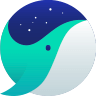
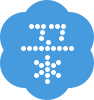

In [116]:
import urllib
from bs4 import BeautifulSoup

response=urllib.request.urlopen(url)
bs=BeautifulSoup(response,'html.parser')
bs

In [117]:
#첫번째 방법

a=bs.find_all('a')

for i in a:
    if i.get('id')!=None:
        print(i.text)

다운로드
네이버를 시작페이지로
한글 입력기
자동완성 레이어
관심주제 설정
TOP


In [121]:
#두번째 방법

a=bs.find_all('a',id=True)

for i in a:
    print(i.text)

다운로드
네이버를 시작페이지로
한글 입력기
자동완성 레이어
관심주제 설정
TOP


In [144]:
#세번째 방법

import numpy as np

a=bs.find_all('a')

for i in a:
    j=str(i)
    if re.search(' id=".*"',j)!=None:   #id 지정 이후 뒤에 공백이 없을 수 있음에 유의!
        print(re.sub('[^\w가-힣\d]','',i.text))

다운로드
네이버를시작페이지로
한글입력기
자동완성레이어
관심주제설정
TOP


#### 과제 07/25_6
##### url = 'https://news.naver.com/' 사이트 p태그에서 class가 cjs_ht인 데이터를 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [85]:
url = 'https://news.naver.com/'

In [86]:
import urllib
from bs4 import BeautifulSoup

response=urllib.request.urlopen(url)
bs=BeautifulSoup(response,'html.parser')


p_cjsht=bs.find_all('p', class_='cjs_ht')
p_cjsht

[<p class="cjs_ht">
                         
                             
                                 오늘 언론사가 발행한<br/>종이신문에 실린 뉴스 1면<br/>기사가 제공됩니다.
                             
                             
                         
                     </p>]

In [250]:
# 띄어쓰기를 위한 문자변수로 변환

text=str(p_cjsht[0])
text

'<p class="cjs_ht">\n                        \n                            \n                            \n                                방송 모아보기 클릭 시<br/>해당 방송사 뉴스를 볼 수 있으며<br/><span class="comp_ico_live">LIVE</span> 표시가 된 경우 생중계로<br/>시청 가능합니다.\n                            \n                        \n                    </p>'

In [254]:
#정규표현식을 이용해 띄어쓰기가 잘 되어있는 문자 추출

import re

text=re.sub('<.*?>',' ',text)
text

' \n                        \n                            \n                            \n                                방송 모아보기 클릭 시 해당 방송사 뉴스를 볼 수 있으며  LIVE  표시가 된 경우 생중계로 시청 가능합니다.\n                            \n                        \n                     '

In [260]:
#불필요한 공백 제거

import re

re.sub('\s{1,}',' ',text).strip()

'방송 모아보기 클릭 시 해당 방송사 뉴스를 볼 수 있으며 LIVE 표시가 된 경우 생중계로 시청 가능합니다.'

---

## find_all( '태그', limit=n)
- find_all로 찾은 태그의 n개를 뽑아 추출할 수 있음

In [152]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = "https://naver.com/"

html = rq.urlopen(url)
bs = BeautifulSoup(html,'lxml')

print(bs.find('p'),'\n')
# print(bs.find_all('p'))

print(bs.find_all('p', limit=1),'\n')
print(bs.find_all('p', limit=2),'\n')     
print(bs.find_all('p', limit=3),'\n')

<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p> 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>] 



In [165]:
from bs4 import BeautifulSoup
import requests as rq

url='https://news.daum.net/politics#1'

html = requests.get(url)
html = html.text
bs = BeautifulSoup(html, 'lxml')


In [171]:
#정치 타이틀 추출


#방법1
title = bs.select('#gnbContent > div > ul > li:nth-child(3) > a > span')
print(title)

#방법2
title = bs.find_all('span', class_="txt_gnb")[2]   
print(title)

#방법3
title = bs.find_all('h2', id=True)
title

[<span class="txt_gnb">정치</span>]
<span class="txt_gnb">정치</span>


[<h2 class="screen_out" id="mainContent">정치</h2>]

In [170]:
title = bs.find_all('h2', id=True)
title

[<h2 class="screen_out" id="mainContent">정치</h2>]

In [244]:
#네이버영화 페이지에서 영화 랭킹을 가져와서 첫번재 영화제목을 출력하기

url = 'https://movie.naver.com/'

html = requests.get(url)
html = html.text

bs = BeautifulSoup(html, 'lxml')

images = bs.find_all('img')
for image in images:
    print(image.attrs['alt'])

자동완성 펼치기
NAVER
영화
미니언즈2
외계+인 1부
범죄도시2
더 킬러: 죽어도 되는 아이
내 손 안 영화매거진 무료로 구독하세요
스페셜 예고편
메인 예고편
메인 예고편
티저 예고편
시선을 빼앗기다
신비한 해저세계
액션 블록버스터
연인의 마지막 장
위험에 빠지다
신념을 건 작전
맨위로
NAVER


In [612]:
#두번째 방법
bs = BeautifulSoup(html,'lxml')
title = bs.find_all('div',class_='tit3')

# for t in title:
#     print(t.text)

print(title[0].text)

IndexError: list index out of range

---

####  과제 0726_1
- 네이버 영화 랭킹을 가져와서 조회순 전체 영화제목을 50개 출력하세요( 출력방식: 1위: 외계+인 1부)

In [624]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

html = rq.get(url).content
bs = BeautifulSoup(html, 'html.parser')
movies = bs.select('#old_content > table > tbody > tr > td > div > a')

n=0
for m in movies:
    movie_name = m.text
    n += 1
    print(f'{n}위: {movie_name}')

1위: 외계+인 1부
2위: 탑건: 매버릭
3위: 한산: 용의 출현
4위: 헤어질 결심
5위: 범죄도시2
6위: 그레이 맨
7위: 토르: 러브 앤 썬더
8위: 미니언즈2
9위: 마녀(魔女) Part2. The Other One
10위: 더 킬러: 죽어도 되는 아이
11위: 비상선언
12위: 엘비스
13위: 명탐정 코난: 할로윈의 신부
14위: 뒤틀린 집
15위: 헌트
16위: 썸머 필름을 타고!
17위: 멘
18위: 아이를 위한 아이
19위: 브로커
20위: 놉
21위: 쥬라기 월드: 도미니언
22위: 메모리
23위: 닥터 스트레인지: 대혼돈의 멀티버스
24위: 핸썸
25위: 뽀로로 극장판 드래곤캐슬 대모험
26위: 로스트 도터
27위: 오싹한 동거
28위: 니얼굴
29위: 탑건
30위: 임파서블 러브
31위: 범죄도시
32위: 굿 럭 투 유, 리오 그랜드
33위: 큐어
34위: 버즈 라이트이어
35위: 군다
36위: 스파이형 모델
37위: 극장판 주술회전 0
38위: 섹스 앤 퓨리
39위: 명량
40위: VR 파이터
41위: 불릿 트레인
42위: 리미트
43위: 마녀
44위: 감동주의보
45위: 특송
46위: 귀멸의 칼날: 아사쿠사 편
47위: 클라우스
48위: 레지던트 이블: 라쿤시티
49위: 아바타: 물의 길
50위: 이상한 나라의 수학자


---

In [193]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

In [200]:
import re

bs = BeautifulSoup(html, 'html.parser')
li = bs.find_all(href = re.compile('https://'))

for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


## CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [291]:
import requests as rq
from bs4 import BeautifulSoup

url = 'http://news.daum.net/politics#1'
r =  rq.get(url)
html = r.text
bs = BeautifulSoup(html)
bs

<!DOCTYPE html>
<html class="os_unknown none unknown version_0" lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="always" name="referrer"/>
<meta content="Daum 뉴스" property="og:author"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="정치" property="og:title"/>
<meta content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" property="og:image"/>
<meta content="다음뉴스" property="og:description"/>
<meta content="https://news.daum.net/politics" property="og:url"/>
<link href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<title>정치 | 다음뉴스</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="//t1.daumcdn.net/media/kraken/news/ac08ae6/style.css.merged.css" rel="stylesheet" type="text/css"/>
<link href="//t1.daumcdn.net/media/kraken/news/ac08ae6/calendar.css.merged.css" rel="stylesheet" type="text/css"/>
<!--[if lte IE 8]>
<script src="https://m2.daumcdn.net/svc/original/U0301/cssjs/JSON-js/fc535e9cc8/json2.

##### body 중간에 기사 헤드 전체 뽑기

In [292]:
#css 선택자를 이용해서 기사 헤드 전체 추출

line = bs.select('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')

print(line,'\n')
print(lines)

[<a class="link_txt" href="https://v.daum.net/v/20220726111417964">[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"</a>] 

[<a class="link_txt" href="https://v.daum.net/v/20220726111417964">[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"</a>, <a class="link_txt" href="https://v.daum.net/v/20220726111023772">[인터뷰] 與 홍석준 "금산분리 등 금융 규제 들여다볼 것"</a>, <a class="link_txt" href="https://v.daum.net/v/20220726111001736">시간외근로 선원, 수당 대신 휴가 조항 삭제..선원법 개정 추진</a>, <a class="link_txt" href="https://v.daum.net/v/20220726110807623">초유의 경란(警亂).. 尹의 '옐로카드'</a>, <a class="link_txt" href="https://v.daum.net/v/20220726110433391">[뉴스라이브] 민주당 전당대회 컷오프 D-2..'586 당권 주자' 김민석 의원에게 묻는다</a>, <a class="link_txt" href="https://v.daum.net/v/20220726110123240">북한 해역에 나타난 중국 선박.."신분 세탁한 北 선박일 수도"</a>, <a class="link_txt" href="https://v.daum.net/v/20220726105953058">박홍근 "국기문란 자초한건 尹대통령..지지율 폭락원인 몰라?"</a>, <a class="link_txt" href="https://v.daum.net/v/20220726105453780">정점식 "박범계, 한동훈 놓고 재임시절 잘못 합리화..후안무치"</a>, <a class="li

In [293]:
#기사 헤드 합치기

body= '\n'.join([line.text for line in lines])
print(body)

[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"
[인터뷰] 與 홍석준 "금산분리 등 금융 규제 들여다볼 것"
시간외근로 선원, 수당 대신 휴가 조항 삭제..선원법 개정 추진
초유의 경란(警亂).. 尹의 '옐로카드'
[뉴스라이브] 민주당 전당대회 컷오프 D-2..'586 당권 주자' 김민석 의원에게 묻는다
북한 해역에 나타난 중국 선박.."신분 세탁한 北 선박일 수도"
박홍근 "국기문란 자초한건 尹대통령..지지율 폭락원인 몰라?"
정점식 "박범계, 한동훈 놓고 재임시절 잘못 합리화..후안무치"
與 "KBS 신뢰 바닥인데..수신료 강제 징수 안돼"
서영교 "김대기·권성동, 尹에 딸랑딸랑만 하냐" 맹폭


- body 중간에 첫번째 기사 헤드 뽑기

In [294]:
#select_one 사용

line = bs.select_one('body > div > main > section > div > div > ul > li > strong > a')
print(line)

body = line.text
print(body)

<a class="link_txt" href="https://v.daum.net/v/20220726111417964">[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"</a>
[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"


##### body 중간에 첫번째 기사 헤드의 내용 뽑아서 불필요한 공백 제거

In [295]:
url = bs.select_one('body > div > main > section > div > div > ul > li > strong > a').attrs['href']
print(url)

html=rq.get(url)
bs2=BeautifulSoup(html.text, 'html.parser')
bs2

https://v.daum.net/v/20220726111417964


<!DOCTYPE html>

<html lang="ko">
<head data-cloud-area="head">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>
            @import url('//t1.daumcdn.net/harmony_static/cloud/page/07dbf94b96594fe2ea9953108239daca8e501bfc1653982322266.css');
            @import url('//t1.daumcdn.net/harmony_static/cloud/2022/06/29/common.98cb4e1c81a314168abb.css')
        </style>
<style>
            /* 다음 카페 소셜 쉐어 임시 비활성화 */
            .list_sns li:nth-child(6) {
                display: none;
            }
        </style>
<meta content="Z5yfeJv8jA" property="mccp:docId"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content='[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"' property="og:title"/>
<meta content="20220726111416" property="og:regDate"/>
<meta content="article" property="og:type"/>
<meta content="KBS" property="og:article:author"/>
<meta content="https://news.v.daum.net/v/Z5yfeJv8jA" property="og:url"/>
<meta content="https://img1.daumcdn.net/

In [296]:
title = bs2.find('h3',class_='tit_view').text
body = '\n'.join([line.text for line in bs2.find('section').find_all('p')[1:]])
print(title + '\n' + body)

[무등의 아침] 이동학 "이재명 당 대표 되면 적대적 공생..망가진 정치 바꿀 것"
◇ 정길훈 앵커 (이하 정길훈): 민주당 당권 주자 가운데 유일한 청년 후보인 이동학 전 최고위원이 어제 광주를 찾았습니다. 이 후보는 낡은 기득권 정치를 끝내고 정치 교체를 이루자, 이렇게 주장하고 있는데요. 이동학 후보 연결합니다. 안녕하십니까?
◆ 더불어민주당 이동학 전 최고위원 (이하 이동학): 안녕하십니까?

◇ 정길훈: 어제 광주를 방문해서 당원들도 만나고 시민도 만나셨을 텐데요. 민심이 어땠습니까?
◆ 이동학: 우선 최선을 다해서 밀어줬는데 대선에서 패배한 데 대해서 실망을 표하시는 분들도 계셨고요. 민주당이 개선의 노력은 안 하는데 선거 때만 읍소를 한다, 이런 실망감을 표시하시는 분도 계셨습니다.
◇ 정길훈: 현재 당권에 여덟 분이 도전하고 있는데요. 이 후보가 당 대표에 도전해야 되겠다고 결심한 이유 어떤 것입니까?

◆ 이동학: 우선 저는 정치가 좀 망가져 있는 것 아닌가라고 판단을 하고 있는데요. 이것은 왜 그러냐 하면 우리가 상대방의 발목을 잡고 못하게 막으면 저들이 넘어지게 되어 있잖아요.
◇ 정길훈: 양당 정치에서 말씀하시는 것이지요.
◆ 이동학: 네. 그러면 선택지가 우리밖에 없으니 우리를 뽑게 되는 것이에요. 국민들 입장에서는요. 그리고 상대방이 또 우리의 발목을 잡고 우리가 넘어지면 또 상대방을 찍는 것이에요. 그러니까 아무런 개선이 없어도 상대방 발목만 잡으면 집권을 하거나 당선이 되는 정치를 하다 보니 국민 입장에서는 삶이 제대로 지켜지기가 어렵다. 이 문제를 지적하면서 지금 게임의 룰을 바꿔야, 정치인에게 이익이 되는 룰이 아니라 국민에게 이익이 되는 룰로 바꿔야 된다. 몇십 년 동안 이렇게 한국 정치가 오면서 점점 양극단의 분노가 계속 쌓이고 있는 것 같아서 이런 상태로는 아무런 위기를 해결할 수 없겠다 이런 절박감에 나오게 됐습니다.
◇ 정길훈: 정치가 망가져 있다고 하셨는데요. 이 후보가 당 대표가 되면 민주당의 모습 어떻게 달라지겠습

##### 추가연습) 김건희 여사 기사 내용 뽑기

In [279]:
url = 'https://news.v.daum.net/v/20220726105712920'

In [283]:
print(url)

html = rq.get(url)
bs2 = BeautifulSoup(html.text, 'html.parser')
bs2

https://news.v.daum.net/v/20220726105712920


<!DOCTYPE html>

<html lang="ko">
<head data-cloud-area="head">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<style>
            @import url('//t1.daumcdn.net/harmony_static/cloud/page/07dbf94b96594fe2ea9953108239daca8e501bfc1653982322266.css');
            @import url('//t1.daumcdn.net/harmony_static/cloud/2022/06/29/common.98cb4e1c81a314168abb.css')
        </style>
<style>
            /* 다음 카페 소셜 쉐어 임시 비활성화 */
            .list_sns li:nth-child(6) {
                display: none;
            }
        </style>
<meta content="UOf9JnyP9M" property="mccp:docId"/>
<meta content="다음뉴스" property="og:site_name"/>
<meta content="2주 넘게 '두문불출' 김 여사..목요일 등장할까?" property="og:title"/>
<meta content="20220726105712" property="og:regDate"/>
<meta content="article" property="og:type"/>
<meta content="MBC" property="og:article:author"/>
<meta content="https://news.v.daum.net/v/UOf9JnyP9M" property="og:url"/>
<meta content="https://img1.daumcdn.net/thumb/S1200x630/?f

In [284]:
title = bs2.find('h3',class_='tit_view').text
body = '\n'.join([line.text for line in bs2.find('section').find_all('p')[1:]])
print(title + '\n' + body)

2주 넘게 '두문불출' 김 여사..목요일 등장할까?
■ "마드리드 이후 김건희 여사가 안 보인다"
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 
북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.

 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다.
■ 공개행보 재개는? 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 

## headers
##### (크롤링 시) 접속 차단되었을 때, header의 User-Agent  지정

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375

In [285]:
#접속이 안되는 경우 예시

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'

req = requests.get(url)
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [303]:
#유저 정보 추가

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}


req = requests.get(url, headers=headers)   #봇이 아님을 인증하는 헤더 정보 추가
bs = BeautifulSoup(req.content, 'html.parser')
print(bs)


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="사회 : 네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/main.naver?mode=LSD&amp;mid=shm&amp;sid1=102" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="교육, 언론, 의료, 인물, 사건사고 등 사회 분야 뉴스 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="사회 : 네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="t

In [304]:
#기사 대표 head 한 개뽑기

target = bs.select_one('#main_content > div > div._persist > div:nth-child(1) > div:nth-child(1) > div.cluster_body > ul > li:nth-child(1) > div.cluster_text > a')
print(target.text, '\n')
print(target, '\n')
print(target['class'], '\n')
print(target['href'])


“우영우엔 공감, 우리에겐 욕설” 2컷 만평 띄운 전장연 

<a class="cluster_text_headline nclicks(cls_nav.clsart)" href="https://n.news.naver.com/mnews/article/020/0003442168?sid=102">“우영우엔 공감, 우리에겐 욕설” 2컷 만평 띄운 전장연</a> 

['cluster_text_headline', 'nclicks(cls_nav.clsart)'] 

https://n.news.naver.com/mnews/article/020/0003442168?sid=102


In [308]:
#기사 대표 head 전체 뽑기

targets = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
head_all='\n'.join([t.text for t in targets])
print(head_all)

“우영우엔 공감, 우리에겐 욕설” 2컷 만평 띄운 전장연
전장연 “‘우영우’엔 공감, 우리에겐 비난·조롱·욕설… 왜 이렇게 다른 반응?”
"우영우엔 공감하면서 지하철 장애인은 조롱" 만평 올린 전장연
전장연 "우영우는 공감하면서, 우리에겐 왜 비난·조롱"
류삼영 총경의 외로운 싸움…오는 30일 14만 경찰 전체회의[뉴스1 PICK]
류삼영, 대기발령 후 첫 출근 "닭의 목 비틀어도 새벽은 온다"
류삼영 총경 "행안부 경찰국은 경찰의 정치적 중립 훼손"
"경찰의 정당한 목소리, 감찰과 위협 맞지 않아"
광주 사립고 시험지 유출 의혹…경찰 수사
광주 모 고교 시험문제 유출…경찰 수사 중
광주 사립고교서 답안지 유출 의혹…고교생 주거지 압수수색
'답안지 유출' 광주 사립고 학생 경찰 조사
‘복마전’ 농협 비상임이사 돈선거…출마자·대의원 무더기 적발
아직도 이런일이...돈으로 표 사려한 농협 비상임이사 후보들
농협 이사 선거 앞두고 금품 거래…경찰, 68명 적발
농협 선거 때 돈 봉투 건넨 이사 ‘집행유예 2년’
전남 상반기 수출액 253억 달러...지난해보다 32.4% 증가
정유업계, 상반기 석유제품 수출액 280억弗…반기 사상 최대
'개량 백신' 들어온다…"8월 말 접종계획 발표"
방역당국 "코로나19 개량 백신 접종계획 다음달 말 발표"
"12·12 쿠데타 준하는 상황"-"윤희근 후보 사퇴하라" 극한 대립
 경찰 집단행동 작심 비판… `하나회 쿠데타`까지 언급한 이상민[人사이더]
이상민 “경찰 집단행동 굉장히 경솔해… 국가기강 흔들리는 것”
이상민, '경찰국 반대' 경찰 회의 확대에 "부화뇌동, 대단히 위험" 비판
코로나 하루 확진자 다시 10만명대 되나..3개월만에 최대치
[속보] 코로나 신규 확진 10만명 육박… 96일 만에 최대치
“동부간선도로·강변북로, 9월 18일까지 부분 통제”
강변북·동부간선로, 9월까지 부분 교통통제… 가로등 교체 공사
6일 개장 광화문광장… 실감형 콘텐츠로 둘러본다
600년전 육조거리였던 광화문광장 3D 영상으로 경험한다
7개 전

In [318]:
#기사 대표 head의 href 뽑기

targets = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')

for t in targets:
    print(t.text)
    print(t['href'])

“우영우엔 공감, 우리에겐 욕설” 2컷 만평 띄운 전장연
https://n.news.naver.com/mnews/article/020/0003442168?sid=102
전장연 “‘우영우’엔 공감, 우리에겐 비난·조롱·욕설… 왜 이렇게 다른 반응?”
https://n.news.naver.com/mnews/article/022/0003718891?sid=102
"우영우엔 공감하면서 지하철 장애인은 조롱" 만평 올린 전장연
https://n.news.naver.com/mnews/article/008/0004775154?sid=102
전장연 "우영우는 공감하면서, 우리에겐 왜 비난·조롱"
https://n.news.naver.com/mnews/article/057/0001679289?sid=102
류삼영 총경의 외로운 싸움…오는 30일 14만 경찰 전체회의[뉴스1 PICK]
https://n.news.naver.com/mnews/article/421/0006240084?sid=102
류삼영, 대기발령 후 첫 출근 "닭의 목 비틀어도 새벽은 온다"
https://n.news.naver.com/mnews/article/025/0003212301?sid=102
류삼영 총경 "행안부 경찰국은 경찰의 정치적 중립 훼손"
https://n.news.naver.com/mnews/article/014/0004873085?sid=102
"경찰의 정당한 목소리, 감찰과 위협 맞지 않아"
https://n.news.naver.com/mnews/article/079/0003668292?sid=102
광주 사립고 시험지 유출 의혹…경찰 수사
https://n.news.naver.com/mnews/article/028/0002599881?sid=102
광주 모 고교 시험문제 유출…경찰 수사 중
https://n.news.naver.com/mnews/article/005/0001542067?sid=102
광주 사립고교서 답안지 유출 의혹…고교생 주거지 압수수색
https://n.news.nav

In [323]:
#이미지 추출하기

url = 'https://n.news.naver.com/mnews/article/014/0004872935?sid=102'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

res = rq.get(url, headers=headers)
html = res.content
bs = BeautifulSoup(html,'lxml')

target = bs.select_one('#img1')
print(target)
print('\n')
print(target['data-src'])

<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/014/2022/07/26/0004872935_001_20220726083904125.jpg?type=w647" id="img1"/>


https://imgnews.pstatic.net/image/014/2022/07/26/0004872935_001_20220726083904125.jpg?type=w647


#### 연습문제
Q. url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.

- 용도는 주요 키워드 분석을 위한 데이터셋 만들기


In [340]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}

res = rq.get(url, headers = headers)
html = res.content
bs = BeautifulSoup(html)

In [352]:
#분석을 위한 데이터셋 만들기

body = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')  #기사 헤드라인 태그 뽑기

all_header=[b.text for b in body]   #기사 헤드라인의 텍스트만 뽑기

all_str_headers='\n'.join(all_header)   #기사 헤드라인 텍스트 타입을 string으로 바꾸기

print(all_str_headers)

박지원, 한동훈·이상민 직격 “과연 스타장관은 특별한 재능 가졌구나”
박지원 "왜 쿠데타냐‥경찰들이 총 한 방 쐈나"
박지원 "경찰 징계…尹, 대통령직을 검찰총장직으로 생각하는 듯"
박지원, 이상민 직격 "경찰이 총 쏘고 한강 넘었냐…한심한 작태"
행안부 內 경찰국 신설안 국무회의 의결…내달 2일 공포
'행안부 경찰국 신설안' 국무회의 통과…내달 2일 공포(종합)
경찰 반발에도 '8월 2일 경찰국 신설' 시행령안 국무회의 통과
[2보] '행안부 경찰국 신설안' 국무회의 의결…내달 2일 공포
“법정주의 용어 아냐” “말씀해주시면 듣겠다”… 전·현직 법무장관 설전
'실세장관' 2인 집중 타깃한 민주…韓·李, '엄호' 대치전선(종합2보)
 한동훈 vs 박범계, 전현직 법무장관의 격돌[속보영상]
대정부질문 데뷔전…한덕수 '노련' 한동훈 '무난' 이상민 '미흡'
이준석 "5명의 당원이 만나고자 해도 다 찾아가겠다"(종합)
"지금 팔도 유람할 때냐" 당내 비판에 이준석 "닭먹고 힘내자" 화답
이준석, 이번엔 울릉도행…보수 텃밭 TK 돌며 '장외정치'
울릉도 간 이준석 "5명이 만나자 해도 갈 것"...장외 정치 계속
한동훈, 내일 첫 ‘尹 독대 보고’…어떤 사안 언급될까
윤 대통령, 오늘 법무부 · 행안부 업무보고
'경찰국 신설 시행령' 국무회의行 vs. 野, 용산行 "경찰장악 규탄"
野 “두달만에 민주주의 통째로 부정”…‘尹정부 경찰장악 규탄’ 총공세
박지원 “검로경불…이상민 ‘스타 장관’이 尹대통령 망친다”
박지원 "'검로경불' 이상민 장관, 아카데미·대종상 감"
[속보]尹대통령 "여가부 폐지 로드맵 조속히 마련하라" 지시
여성가족부, 추진과제 보고했더니‥윤 대통령 "폐지 로드맵 조속히"
尹 “경찰 집단행동에 깊은 우려…국가기강 문란될 수 있어”
尹대통령 "중대한 국가 기강 문란"…경찰에 한달새 2번 강력 경고
박홍근 "이상민, '행정쿠데타' 발상…국기문란? 누가 일으키나"
용산으로 몰려간 野…박홍근 "진정 국기문란은 윤석열 정부가"
野 컷오프 이틀 앞인데…비명계 '

In [384]:
# 정규표현식으로 '...','\n' 삭제

import re

all_str_headers = re.sub('…',' ',all_str_headers)
print(all_str_headers)

박지원 한동훈·이상민 직격 “과연 스타장관은 특별한 재능 가졌구나” 박지원  왜 쿠데타냐‥경찰들이 총 한 방 쐈나  박지원  경찰 징계 尹 대통령직을 검찰총장직으로 생각하는 듯  박지원 이상민 직격  경찰이 총 쏘고 한강 넘었냐 한심한 작태  행안부 內 경찰국 신설안 국무회의 의결 내달 2일 공포  행안부 경찰국 신설안  국무회의 통과 내달 2일 공포(종합) 경찰 반발에도  8월 2일 경찰국 신설  시행령안 국무회의 통과 [2보]  행안부 경찰국 신설안  국무회의 의결 내달 2일 공포 “법정주의 용어 아냐” “말씀해주시면 듣겠다”  전·현직 법무장관 설전  실세장관  2인 집중 타깃한 민주 韓·李  엄호  대치전선(종합2보)  한동훈 vs 박범계 전현직 법무장관의 격돌[속보영상] 대정부질문 데뷔전 한덕수  노련  한동훈  무난  이상민  미흡  이준석  5명의 당원이 만나고자 해도 다 찾아가겠다 (종합)  지금 팔도 유람할 때냐  당내 비판에 이준석  닭먹고 힘내자  화답 이준석 이번엔 울릉도행 보수 텃밭 TK 돌며  장외정치  울릉도 간 이준석  5명이 만나자 해도 갈 것 ...장외 정치 계속 한동훈 내일 첫 ‘尹 독대 보고’ 어떤 사안 언급될까 윤 대통령 오늘 법무부 · 행안부 업무보고  경찰국 신설 시행령  국무회의行 vs. 野 용산行  경찰장악 규탄  野 “두달만에 민주주의 통째로 부정” ‘尹정부 경찰장악 규탄’ 총공세 박지원 “검로경불 이상민 ‘스타 장관’이 尹대통령 망친다” 박지원   검로경불  이상민 장관 아카데미·대종상 감  [속보]尹대통령  여가부 폐지 로드맵 조속히 마련하라  지시 여성가족부 추진과제 보고했더니‥윤 대통령  폐지 로드맵 조속히  尹 “경찰 집단행동에 깊은 우려 국가기강 문란될 수 있어” 尹대통령  중대한 국가 기강 문란  경찰에 한달새 2번 강력 경고 박홍근  이상민  행정쿠데타  발상 국기문란? 누가 일으키나  용산으로 몰려간 野 박홍근  진정 국기문란은 윤석열 정부가  野 컷오프 이틀 앞인데 비명계  조기 단일화  속내는?

In [ ]:
#윤정준님

from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
import requests

url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
rqs = requests.get(url,headers=headers).text
bs = BeautifulSoup(rqs,'lxml')
bs = bs.find_all('div',class_='cluster')
result = []
for i in bs:
    result.append(i.get_text())
bs = re.sub('[^가-힣]+',' ',str(result))

okok = Okt()
okok2 = okok.pos(bs)
okre = []
for i, j in okok2:
    if (j =='Noun')& (len(i)> 1 ):
        okre.append(i)

okreid = dict(Counter(okre).most_common())
okreid = sorted(okreid.items(), key=lambda x:x[1], reverse=True)
okreid


#### 과제07/26_2
##### 네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
#참고
#sid1= 정치/경제/생활문화/IT과학
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
#sid2= 각각의 sub 탭
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=264
#page
https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2=264&sid1=100&date=20220726&page=2

In [383]:
'''
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat2)+'&sid1=100&date=20220726&page='+str(i+1)
'''

"\nurl = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat2)+'&sid1=100&date=20220726&page='+str(i+1)\n"

In [373]:
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [382]:
#정치

cats = [264,265,268,267]
ind = 0
for cat in cats:
    if 
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        
        news = requests.get(url, headers = headers)
        bs = BeautifulSoup(news.content, 'lxml')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        
        #기사 헤드를 긁어서 뉴스링크들 모으기
        newslinks=[]
        for j, link in enumerate(links):            
            newslink = link.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks))    #중복 기사 제거
        
        #뉴스링크들 가지고 기사 본문 크롤링
        for link in newslinks:
            res2 = requests.get(link, headers = headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n', '', news)  #개행을 공백으로
            news = re.sub('\t', '', news)  #탭을 공백으로
            news_df.loc[ind] = [news, cat]
            ind += 1

news_df

,news,category
0,"""업무보고서 사면 얘기 안 나와…검찰총장, 상식·정의 따라 검찰 이끄는 분 될 것""...",264
1,[서울=뉴시스] 윤석열 대통령이 26일 서울 용산 대통령실 청사에서 한동훈 법무부 ...,264
2,[[the300](상보)]윤석열 대통령이 26일 용산 대통령실 집무실에서 한동훈 법...,264
3,기사내용 요약전담수사부서 살리고 형사부 수사권 부여검경 협의회 통해 '검수완박' 시...,264
4,"기사내용 요약티타임 '검언유착' 비판에 ""그렇게 보이지 않는다""""공직자, 언론으로부...",264
...,...,...
1159,(울산=연합뉴스) 김근주 기자 = 행정안전부 경찰국 신설 반대 경찰서장 회의...,267
1160,"총리 주재 국무회의서 시행령 의결“행안장관, 잘 설득해 달라” 주문다음 달 2일 공...",267
1161,(인천공항=뉴스1) 조태형 기자 = 이종섭 국방부 장관이 한미 국방장관회담과 한국전...,267
1162,(서울=연합뉴스) 김영은 기자 = 국가보훈처에 따르면 미국 워싱턴D.C에 있는 한국...,267


In [394]:
news_df2=pd.DataFrame(columns=['news','category'])
news_df2

,news,category


In [437]:
#경제
#(금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

import requests as rq
from bs4 import BeautifulSoup

category = [259,258,261,262,260]
ind = 0

for cat in category:
    if cat==262:
        for i in range(6):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=101&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            html = rq.get(url, headers = headers).content
            bs = BeautifulSoup(html, 'html.parser')
            a = bs.select('#main_content > div > ul > li > dl > dt> a')
    else:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=101&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            html = rq.get(url, headers = headers).content
            bs = BeautifulSoup(html, 'html.parser')
            a = bs.select('#main_content > div > ul > li > dl > dt> a')
        
            #a태그 내 뉴스링크 모으기
            news_links = []
            for i in a:
                news_link = i.get('href')
                news_links.append(news_link)
                news_links = list(set(news_links))

            #뉴스링크로 뉴스 본문 크롤링
            for link in news_links:
                html2 = rq.get(link, headers = headers).content
                bs2 = BeautifulSoup(html2, 'html.parser')
                bs2.find('div', id='dic_area').text
                news = bs2.find('div', id='dic_area').text
                news = re.sub('\n','',news)
                news = re.sub('\t','',news)
                news_df2.loc[ind] = [news, cat]
                ind += 1
news_df2    

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [438]:
news_df3=pd.DataFrame(columns=['news','category'])
news_df3

,news,category


In [430]:
#생활/문화: 103

category = [241,237,242,248,245]
ind = 0

for cat in category:
    for i in range(15):
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=103&date=20220726&page='+str(i+1)
        html = rq.get(url, headers = headers).content
        bs = BeautifulSoup(html,'html.parser')
        a = bs.select('#main_content > div > ul > li > dl > dt> a')
        
        news_links=[]
        for i in a:
            link = i['href']
            news_links.append(link)
            news_links = list(set(news_links))
            
        for news_link in news_links:
            html2 = rq.get(news_link, headers = headers).content
            bs2 = BeautifulSoup(html2, 'html.parser')
            if bs2.find('div', id='dic_area').text==None:
                pass
            else:
                news = bs2.find('div', id='dic_area').text
            news = re.sub('\n\t','',news)
            news_df3.loc[ind]=[news, cat]
            ind += 1
news_df3

AttributeError: 'NoneType' object has no attribute 'text'

In [439]:
#IT/과학: 105

category = [227,230,283,228]
ind = 0

for cat in category:
    url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=105&date=20220726&page='+str(i+1)
    html = rq.get(url, headers = headers)
    bs = BeautifulSoup(html,'lxml')
    a = bs.select('#main_content > div > ul > li > dl > dt> a')
    
    for i in a:
        

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

#### 과제 07/26_2_2:  파일 다운로드 

##### 네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [673]:
import pandas as pd

news_df = pd.read_json('news_df.json',encoding = 'utf*8')
news_df

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


In [674]:
#카테고리란 만들기

news_df['field'] = np.nan
news_df.head()

,news,category,field
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264,NaN
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264,NaN
2,[포토] 육군 대규모 항공작전 훈련,264,NaN
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264,NaN
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264,NaN


In [675]:
#분야별 카테고리 나누기
def fieldset(x):
    y = ''
    if x in [264,265,268,267]:
        y = '정치'
    elif x in [258,259,261,262,260]:
        y = '경제'
    elif x in [241,237,242,248,245]:
        y = '생활/문화'
    else:
        y = 'IT/과학'
    return y

news_df['field']=news_df['category'].apply(lambda x: fieldset(x))

- 중복 데이터 삭제 후 전처리

In [676]:
#중복되는 뉴스 개수 확인

news_df.duplicated(subset='news').sum()

872

In [677]:
#중복된 뉴스 삭제한 새로운 데이터프레임 만들기

news_df2 = news_df.drop_duplicates(subset='news')
news_df2

,news,category,field
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264,정치
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264,정치
2,[포토] 육군 대규모 항공작전 훈련,264,정치
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264,정치
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264,정치
...,...,...,...
2940,"IBS, 세상에서 가장 작은 반도체 구조 규명",228,IT/과학
2941,프랑스 유텔샛 “스페이스X 게 섰거라”,228,IT/과학
2942,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228,IT/과학
2943,세상에서 가장 작은 반도체 구조 규명,228,IT/과학


C:\Users\admin\anaconda3\envs\cakd7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='field', ylabel='count'>

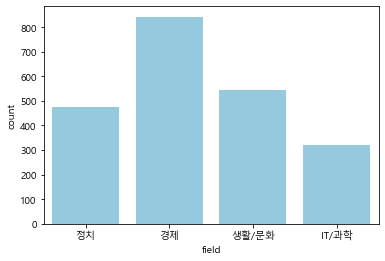

In [678]:
#분야별 데이터 개수 시각화

import seaborn as sns
from matplotlib import font_manager, rc

font_path='C:/cakd7/m2_분석라이브러리활용/visualization/dataset/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()

rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

sns.countplot(news_df2['field'], color='skyblue')

In [679]:
#뉴스 데이터 살펴보기

print(' '.join(list(news_df2['news'])))

尹 대통령 "기업활동 위축시키는 과도한 형벌 규정 개선" 지시 국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐” [포토] 육군 대규모 항공작전 훈련 尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들 "이명박·이재용·김경수 통큰 사면 요청" [정치+] 윤대통령, '국기 문란' 경찰 질타…경찰 내부 반발 고조 尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나? 尹대통령 “법무행정 최우선은 경제 살리기…기업 위축하는 형벌규정 개선” 문체부 "청와대 활용 정부 내 혼선 없어…이미 정리" [법무부 업무보고] 한동훈 "공수처 1년, 국가 범죄대응 역량 약화" 쌍용차 채권단 "변제율 6% 상식적이지 않아"…尹대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐…尹 대통령과 '14만 경찰' 대치 전선 고조(종합) 尹 한동훈에 “기업활동 위축 과도한 형벌 개선하라” 윤대통령 "경찰 집단행동 국기문란"…경찰국 신설안 국무회의 통과 "검수완박 이전으로 회귀"…尹, 한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들 “이명박·이재용·김경수 통큰 특별사면” 탄원 윤 대통령, 한동훈에 "법무행정 최우선, 경제 살리기" 당부 한동훈, '檢티타임 부활 지적에 "언론으로부터 불편 질문받아야" 박홍근 “경찰국 신설, 이상민 행안부 장관의 행정 쿠데타” [포토] 육군 이천기지서 열린 대규모 항공작전 FTX 한동훈, 박범계 '검언유착' 지적에 "전정부는 흘리기 없었나" 한동훈 "제가 인사 평가 주제 넘어…現검증 시스템 안착 고민할 때" 尹 "법무행정 최우선 경제에"…한동훈 "이재용 사면? 언급 부적절" 공수처, 尹 대통령 ‘사적 채용 논란’ 고발 사건 수사 착수 공수처, 尹대통령 '사적채용 논란' 고발건 수사1부 배당 尹대통령 "기업 활동 위축 과도한 형벌 규정 개선" 尹대통령, 복심 한동훈 장관에 "기업활동 위축 과도한 형벌규정 개선하라" 지시 尹, 한동훈 장관에 “기업 위축시키는 과도한 형벌 개선하라” [뉴스1 PICK]윤석열 대통령 "경찰 집

In [680]:
#정규표현식으로 불필요한 내용 삭제   

news_df2 = news_df2.replace('[^\w ]',' ', regex=True)  # (대)괄호 지우기 #ex)(속보),[속보],... 등등 삭제
news_df2 = news_df2.replace('…',' ', regex=True)   
news_df2 = news_df2.replace('[\s{1,}]',' ', regex=True)  # 띄어쓰기가 1번 이상 -> 1번


print(' '.join(list(news_df2['news'])))

尹 대통령  기업활동 위축시키는 과도한 형벌 규정 개선  지시 국방부  유엔사  판문점 통과 허용 북송 승인 의미는 아냐   포토  육군 대규모 항공작전 훈련 尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 7대 종단 지도자들  이명박 이재용 김경수 통큰 사면 요청   정치   윤대통령   국기 문란  경찰 질타 경찰 내부 반발 고조 尹 대통령 최측근 한동훈 법무장관에 무슨 지시했나  尹대통령  법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선  문체부  청와대 활용 정부 내 혼선 없어 이미 정리   법무부 업무보고  한동훈  공수처  년  국가 범죄대응 역량 약화  쌍용차 채권단  변제율 6  상식적이지 않아  尹대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 尹 대통령과   4만 경찰  대치 전선 고조 종합  尹 한동훈에  기업활동 위축 과도한 형벌 개선하라  윤대통령  경찰 집단행동 국기문란  경찰국 신설안 국무회의 통과  검수완박 이전으로 회귀  尹  한동훈에 수사권 강화 보고받아 국내 7대 종단 지도자들  이명박 이재용 김경수 통큰 특별사면  탄원 윤 대통령  한동훈에  법무행정 최우선  경제 살리기  당부 한동훈   檢티타임 부활 지적에  언론으로부터 불편 질문받아야  박홍근  경찰국 신설  이상민 행안부 장관의 행정 쿠데타   포토  육군 이천기지서 열린 대규모 항공작전 FTX 한동훈  박범계  검언유착  지적에  전정부는 흘리기 없었나  한동훈  제가 인사 평가 주제 넘어 現검증 시스템 안착 고민할 때  尹  법무행정 최우선 경제에  한동훈  이재용 사면  언급 부적절  공수처  尹 대통령  사적 채용 논란  고발 사건 수사 착수 공수처  尹대통령  사적채용 논란  고발건 수사 부 배당 尹대통령  기업 활동 위축 과도한 형벌 규정 개선  尹대통령  복심 한동훈 장관에  기업활동 위축 과도한 형벌규정 개선하라  지시 尹  한동훈 장관에  기업 위축시키는 과도한 형벌 개선하라   뉴스  PICK 윤석열 대통령  경찰 집

In [ ]:
#분야별 테이블 추출
pol2 = news_df2[news_df2['field']=='정치']
eco2 = news_df2[news_df2['field']=='경제']
cul2 = news_df2[news_df2['field']=='생활/문화']
it2 = news_df2[news_df2['field']=='IT/과학']

#분야별 뉴스 본문 string으로 합치기
pol_dataset2 = ' '.join(list(pol2['news']))
eco_dataset2 = ' '.join(list(eco2['news']))
cul_dataset2 = ' '.join(list(cul2['news']))
it_dataset2 = ' '.join(list(cul2['news']))
pol_dataset2

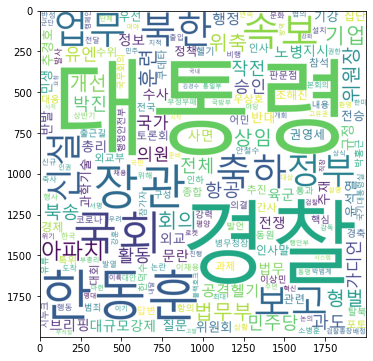

In [609]:
# 품사, 단어, 개수 추출

from konlpy.tag import Okt, Hannanum
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#방법1 
okt = Okt()
morph_por = okt.pos(pol_dataset2)

noun_list = []
for word, tag in morph_por:
    if len(word)>1 and tag in ('Noun','Foreign'):
        noun_list.append(word)

counter = Counter(noun_list)
counter_dict = dict(counter.most_common())

wordcloud = WordCloud( font_path='../visualization/dataset/malgun.ttf',
                       background_color = 'white',
                       width = 2000,
                       height = 2000).generate_from_frequencies(counter_dict)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud)